# <font color="Orange">Traffic Accidents Analysis in Rome

# Introduction
The data is collected from open data portal of the municipality of Rome. It contains the datasets of accidents on the streets of Rome from 2006 to 2021. On the portal it is provided separately month by month and it needed to be merged into one dataset for the purpose of this analysis. This process is done separately and doesn't exist in this report. Here we will work on only one csv file containing the data of the whole 16 years. The nature of recording the data is not quite clear and a description for each column is not provided. Therefore, this has to be worked out throughout the analysis and it is done step by step in the first part of the notebook (e.g. understanding what does the column "protocollo" represent in each row.)

#### importing the libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium as flm

# <font color='darkblue'> Part 1: Loading, organizing and cleaning the Data </font>

In [4]:
df = pd.read_csv("E:\\Polimi\\1st semester\\Data Science\\Lecture Slides-20220913\\Assignments\\First Assignment\\data_RomeTrafficAccidents\\Yearly data\\Incidenti_16_years.csv")

C:\Users\Ali\AppData\Local\Temp\ipykernel_19500\3154945407.py:1: DtypeWarning: Columns (19,20,24,25,26,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:\\Polimi\\1st semester\\Data Science\\Lecture Slides-20220913\\Assignments\\First Assignment\\data_RomeTrafficAccidents\\Yearly data\\Incidenti_16_years.csv")


#### Going through some features and possible cleaning
Let's have a general look at the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265395 entries, 0 to 1265394
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Protocollo              1265395 non-null  int64  
 1   Gruppo                  1265395 non-null  int64  
 2   DataOraIncidente        1265395 non-null  object 
 3   Localizzazione1         1259169 non-null  object 
 4   STRADA1                 1265395 non-null  object 
 5   Localizzazione2         1265395 non-null  object 
 6   STRADA2                 511687 non-null   object 
 7   Strada02                994247 non-null   object 
 8   Chilometrica            482560 non-null   object 
 9   DaSpecificare           271148 non-null   object 
 10  NaturaIncidente         1265323 non-null  object 
 11  particolaritastrade     1259021 non-null  object 
 12  TipoStrada              1259064 non-null  object 
 13  FondoStradale           1259091 non-null  object 
 14  Pa

Now let's see the number of NaN values for each feature:

In [6]:
df.isnull().sum()

Protocollo                     0
Gruppo                         0
DataOraIncidente               0
Localizzazione1             6226
STRADA1                        0
Localizzazione2                0
STRADA2                   753708
Strada02                  271148
Chilometrica              782835
DaSpecificare             994247
NaturaIncidente               72
particolaritastrade         6374
TipoStrada                  6331
FondoStradale               6304
Pavimentazione              6279
Segnaletica                 6296
CondizioneAtmosferica       6306
Traffico                    6611
Visibilita                  6310
Illuminazione             110368
NUM_FERITI                     0
NUM_RISERVATA                  0
NUM_MORTI                      0
NUM_ILLESI                     0
Longitudine               707715
Latitudine                707882
Confermato                     4
Progressivo                36249
TipoVeicolo                36249
StatoVeicolo               36249
TipoPerson

__Some of the missing values happens because of the nature of storing the data and they make sense, for example the gender of the person when there has been no person in a parked vehicle must be a missing value__ 

In [7]:
df['Sesso'].value_counts()

M             826905
F             415139
Conducente         4
Passeggero         2
Name: Sesso, dtype: int64

### 6 values make problems, let's have a look at them:

In [8]:
df[(df["Sesso"] != 'M') & (df["Sesso"] != 'F') & (~df['Sesso'].isnull())]

Protocollo  Gruppo  DataOraIncidente Localizzazione1  \
527295     1892469       7  05/11/2011 13:15   Strada Urbana   
527296     1892469       7  05/11/2011 13:15   Strada Urbana   
527297     1892469       7  05/11/2011 13:15   Strada Urbana   
527298     1892469       7  05/11/2011 13:15   Strada Urbana   
824628     2519636      11  01/10/2015 20:00   Strada Urbana   
824629     2519636      11  01/10/2015 20:00   Strada Urbana   

                             STRADA1 Localizzazione2 STRADA2 Strada02  \
527295          VIA DI TOR TRE TESTE  da specificare     NaN      NaN   
527296          VIA DI TOR TRE TESTE  da specificare     NaN      NaN   
527297          VIA DI TOR TRE TESTE  da specificare     NaN      NaN   
527298          VIA DI TOR TRE TESTE  da specificare     NaN      NaN   
824628  VIA GIULIO ARISTIDE SARTORIO  da specificare     NaN      NaN   
824629  VIA GIULIO ARISTIDE SARTORIO  da specificare     NaN      NaN   

       Chilometrica       DaSpecificare  ... Progressivo TipoVeicolo  \
527295          NaN  IN CORR DEL F.C,10  ...        -1.0           1   
527296          NaN  IN CORR DEL F.C,10  ...        -1.0           1   
527297          NaN  IN CORR DEL F.C,10  ...        -1.0           2   
527298          NaN  IN CORR DEL F.C,10  ...        -1.0           2   
824628          NaN     altezza civ. 62  ...        -1.0           1   
824629          NaN     altezza civ. 62  ...        -1.0           2   

               StatoVeicolo                    TipoPersona       Sesso  \
527295  Autovettura privata  In marcia / fermata / arresto  Conducente   
527296  Autovettura privata  In marcia / fermata / arresto  Passeggero   
527297  Autovettura privata  In marcia / fermata / arresto  Conducente   
527298  Autovettura privata  In marcia / fermata / arresto  Passeggero   
824628  Autovettura privata  In marcia / fermata / arresto  Conducente   
824629  Autovettura privata  In marcia / fermata / arresto  Conducente   

       Tipolesione Deceduto DecedutoDopo CinturaCascoUtilizzato         Airbag  
527295           M   Illeso            0                    NaN  Non accertato  
527296           M   Illeso            0                    NaN  Non accertato  
527297           F   Illeso            0                    NaN  Non accertato  
527298           M   Illeso            0                    NaN  Non accertato  
824628           M   Illeso            0                    NaN  Non accertato  
824629           M   Illeso            0                    NaN  Non accertato  

[6 rows x 37 columns]

In [9]:
df[df['Protocollo'] == 2519636]

Protocollo  Gruppo  DataOraIncidente Localizzazione1  \
824628     2519636      11  01/10/2015 20:00   Strada Urbana   
824629     2519636      11  01/10/2015 20:00   Strada Urbana   

                             STRADA1 Localizzazione2 STRADA2 Strada02  \
824628  VIA GIULIO ARISTIDE SARTORIO  da specificare     NaN      NaN   
824629  VIA GIULIO ARISTIDE SARTORIO  da specificare     NaN      NaN   

       Chilometrica    DaSpecificare  ... Progressivo TipoVeicolo  \
824628          NaN  altezza civ. 62  ...        -1.0           1   
824629          NaN  altezza civ. 62  ...        -1.0           2   

               StatoVeicolo                    TipoPersona       Sesso  \
824628  Autovettura privata  In marcia / fermata / arresto  Conducente   
824629  Autovettura privata  In marcia / fermata / arresto  Conducente   

       Tipolesione Deceduto DecedutoDopo CinturaCascoUtilizzato         Airbag  
824628           M   Illeso            0                    NaN  Non accertato  
824629           M   Illeso            0                    NaN  Non accertato  

[2 rows x 37 columns]

__In these 6 rows the values of many features are written in the wrong column and they all correspond to only two protocols so we can remove them because they represent a tiny percentage of the whole dataset:__

In [10]:
bad_rows = df[(df["Sesso"] != 'M') & (df["Sesso"] != 'F') & (~df['Sesso'].isnull())].index
bad_rows

Int64Index([527295, 527296, 527297, 527298, 824628, 824629], dtype='int64')

In [11]:
df.drop(index=bad_rows, inplace=True)

In [12]:
df["Sesso"].value_counts()

M    826905
F    415139
Name: Sesso, dtype: int64

### Now we only have M, F and NaN values in this column.
### Let's have a look at some of the numerical columns:

In [13]:
df['Deceduto'].value_counts()

0     1210158
0       32718
-1       1733
-1         44
Name: Deceduto, dtype: int64

In [14]:
df['Confermato'].value_counts()

-1    1231867
0       17140
-1      16373
0           9
Name: Confermato, dtype: int64

In [15]:
df['NUM_ILLESI'].value_counts()

 2     377757
 1     319468
 3     244127
 4     129120
 0      80388
 5      63066
 6      29900
 7      12090
 8       5117
 9       2229
 10      1010
 11       475
 12       174
 13       169
-1        141
 14        71
 20        40
 17        34
 18        13
Name: NUM_ILLESI, dtype: int64

In [16]:
pd.set_option('display.max_columns', None)
df[df['NUM_ILLESI'] == -1].head()

Protocollo  Gruppo  DataOraIncidente Localizzazione1  \
6711      1669138       4  28/01/2006 11:04         Statale   
6712      1669138       4  28/01/2006 11:04         Statale   
6713      1669138       4  28/01/2006 11:04         Statale   
18419     1674300       4  09/03/2006 04:50   Strada Urbana   
27359     1678142       7  08/04/2006 10:45   Strada Urbana   

                     STRADA1 Localizzazione2 STRADA2        Strada02  \
6711             VIA SALARIA   in prossimità     NaN  del civico n.    
6712             VIA SALARIA   in prossimità     NaN  del civico n.    
6713             VIA SALARIA   in prossimità     NaN  del civico n.    
18419  VIA DEI PRATI FISCALI   in prossimità     NaN  del civico n.    
27359           VIA CASILINA   in prossimità     NaN  del civico n.    

      Chilometrica DaSpecificare  \
6711          1699           NaN   
6712          1699           NaN   
6713          1699           NaN   
18419          403           NaN   
27359          809           NaN   

                                         NaturaIncidente  \
6711              Scontro frontale fra veicoli in marcia   
6712              Scontro frontale fra veicoli in marcia   
6713              Scontro frontale fra veicoli in marcia   
18419            Veicolo in marcia contro ostacolo fisso   
27359  Scontro frontale/laterale DX fra veicoli in ma...   

              particolaritastrade                      TipoStrada  \
6711                   Rettilineo  Una carreggiata a doppio senso   
6712                   Rettilineo  Una carreggiata a doppio senso   
6713                   Rettilineo  Una carreggiata a doppio senso   
18419  Curva senza visuale libera                 Due carreggiate   
27359                  Rettilineo                 Due carreggiate   

           FondoStradale Pavimentazione               Segnaletica  \
6711   Bagnato (pioggia)      Asfaltata               Orizzontale   
6712   Bagnato (pioggia)      Asfaltata               Orizzontale   
6713   Bagnato (pioggia)      Asfaltata               Orizzontale   
18419  Bagnato (pioggia)      Asfaltata               Orizzontale   
27359           Asciutto      Asfaltata  Verticale ed orizzontale   

      CondizioneAtmosferica Traffico Visibilita Illuminazione NUM_FERITI  \
6711               Nuvoloso  Normale      Buona    Ore Diurne          2   
6712               Nuvoloso  Normale      Buona    Ore Diurne          2   
6713               Nuvoloso  Normale      Buona    Ore Diurne          2   
18419              Nuvoloso   Scarso      Buona   Sufficiente          0   
27359                Sereno  Normale      Buona    Ore Diurne          1   

       NUM_RISERVATA  NUM_MORTI  NUM_ILLESI Longitudine Latitudine Confermato  \
6711               1          1          -1         NaN        NaN         -1   
6712               1          1          -1         NaN        NaN         -1   
6713               1          1          -1         NaN        NaN         -1   
18419              1          1          -1         NaN        NaN         -1   
27359              1          1          -1         NaN        NaN         -1   

       Progressivo          TipoVeicolo                   StatoVeicolo  \
6711           1.0  Autovettura privata  In marcia / fermata / arresto   
6712           1.0  Autovettura privata  In marcia / fermata / arresto   
6713           2.0  Autovettura privata  In marcia / fermata / arresto   
18419          1.0  Autovettura privata  In marcia / fermata / arresto   
27359          1.0          Ciclomotore  In marcia / fermata / arresto   

      TipoPersona Sesso         Tipolesione Deceduto  \
6711   Conducente     M          Ricoverato        0   
6712   Passeggero     F  Prognosi riservata        0   
6713   Conducente     F           Rimandato        0   
18419  Conducente     F  Prognosi riservata        0   
27359  Conducente     M  Prognosi riservata        0   

                       DecedutoDopo CinturaCascoUtilizzato   

There are 141 values of -1 in num illesi, we will leave it for now. later we might remove them or replace them with 1 if needed for any kind of analysis

In [17]:
df['NUM_FERITI'].value_counts()

0     677539
1     391964
2     111367
3      31293
0      17533
4      12222
1      10924
5       4711
2       2932
6       1768
7        824
3        823
4        324
8        272
9        204
5        151
10       106
17        59
65        55
6         53
12        51
21        41
32        40
18        38
11        36
7         22
25        22
15        15
Name: NUM_FERITI, dtype: int64

In [18]:
df[df['NUM_FERITI'] == 1]

Protocollo  Gruppo     DataOraIncidente Localizzazione1  \
0           1665093       2     01/01/2006 01:00   Strada Urbana   
1           1665093       2     01/01/2006 01:00   Strada Urbana   
2           1665093       2     01/01/2006 01:00   Strada Urbana   
3           1665093       2     01/01/2006 01:00   Strada Urbana   
4           1665093       2     01/01/2006 01:00   Strada Urbana   
...             ...     ...                  ...             ...   
1265357     5765935       2  30/12/2021 19:10:00   Strada Urbana   
1265358     5765935       2  30/12/2021 19:10:00   Strada Urbana   
1265364     5766030       2  30/12/2021 10:45:00   Strada Urbana   
1265367     5766099       2  31/12/2021 15:50:00   Strada Urbana   
1265394     5923198       8  21/12/2021 16:00:00   Strada Urbana   

                        STRADA1                     Localizzazione2  \
0                  VIA FOGLIANO                all'intersezione con   
1                  VIA FOGLIANO                all'intersezione con   
2                  VIA FOGLIANO                all'intersezione con   
3                  VIA FOGLIANO                all'intersezione con   
4                  VIA FOGLIANO                all'intersezione con   
...                         ...                                 ...   
1265357      VIA FLAMINIA NUOVA  all'intersezione semaforizzata con   
1265358      VIA FLAMINIA NUOVA  all'intersezione semaforizzata con   
1265364            VIA FLAMINIA                       in prossimità   
1265367  VIA DEI CAMPI SPORTIVI                      da specificare   
1265394       VIA DEL TORRACCIO                      da specificare   

                       STRADA2               Strada02 Chilometrica  \
0                    VIA ANAPO              VIA ANAPO          NaN   
1                    VIA ANAPO              VIA ANAPO          NaN   
2                    VIA ANAPO              VIA ANAPO          NaN   
3                    VIA ANAPO              VIA ANAPO          NaN   
4                    VIA ANAPO              VIA ANAPO          NaN   
...                        ...                    ...          ...   
1265357  VIA GIOVANNI FABBRONI  VIA GIOVANNI FABBRONI          NaN   
1265358  VIA GIOVANNI FABBRONI  VIA GIOVANNI FABBRONI          NaN   
1265364                    NaN          del civico n.          289   
1265367                    NaN                    NaN          NaN   
1265394                    NaN                    NaN          NaN   

                                        DaSpecificare  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
1265357                                           NaN   
1265358                                           NaN   
1265364                                           NaN   
1265367  rampa accesso Foro  Italico dir. S. Giovanni   
1265394          200 metri di distanza dal civico 282   

                                           NaturaIncidente  \
0        Scontro frontale/laterale SX fra veicoli in ma...   
1        Scontro frontale/laterale SX fra veicoli in ma...   
2        Scontro frontale/laterale SX fra veicoli in ma...   
3        Scontro frontale/laterale SX fra veicoli in ma...   
4        Scontro frontale/laterale SX fra veicoli in ma...   
...                                                    ...   
1265357                             Investimento di pedone   
1265358                             Investimento di pedone   
1265364                  Infortunio per caduta del veicolo   
1265367                    Fuoriuscita dalla sede stradale   
1265394                  Infortunio per caduta del veicolo   

                particolaritastrade                               Ti

In [19]:
df[df['NUM_FERITI'] == '1']

Protocollo  Gruppo  DataOraIncidente            Localizzazione1  \
524288     1891515      10  26/10/2011 16:15              Strada Urbana   
524289     1891515      10  26/10/2011 16:15              Strada Urbana   
524290     1891515      10  26/10/2011 16:15              Strada Urbana   
524291     1891515      10  26/10/2011 16:15              Strada Urbana   
524293     1891517       8  26/10/2011 09:00              Strada Urbana   
...            ...     ...               ...                        ...   
835562     2594594      18  22/11/2015 18:30              Strada Urbana   
835568     2594616      17  24/11/2015 09:50              Strada Urbana   
835569     2594616      17  24/11/2015 09:50              Strada Urbana   
835575     2594627      20  24/11/2015 18:40  Regionale entro l'abitato   
835576     2594627      20  24/11/2015 18:40  Regionale entro l'abitato   

                    STRADA1       Localizzazione2           STRADA2  \
524288        VIA TUSCOLANA     in corrispondenza               NaN   
524289        VIA TUSCOLANA     in corrispondenza               NaN   
524290        VIA TUSCOLANA     in corrispondenza               NaN   
524291        VIA TUSCOLANA     in corrispondenza               NaN   
524293  VIA TERMINI IMERESE  all'intersezione con  VIA ROCCAVALDINA   
...                     ...                   ...               ...   
835562          VIA AURELIA         in prossimità               NaN   
835568    VIA FRA' ALBENZIO         in prossimità               NaN   
835569    VIA FRA' ALBENZIO         in prossimità               NaN   
835575         VIA FLAMINIA  all'intersezione con       VIA BEVAGNA   
835576         VIA FLAMINIA  all'intersezione con       VIA BEVAGNA   

                Strada02 Chilometrica DaSpecificare  \
524288    del civico n.           963           NaN   
524289    del civico n.           963           NaN   
524290    del civico n.           963           NaN   
524291    del civico n.           963           NaN   
524293  VIA ROCCAVALDINA          NaN           NaN   
...                  ...          ...           ...   
835562     del civico n.   fronte 273           NaN   
835568     del civico n.      1:00 AM           NaN   
835569     del civico n.      1:00 AM           NaN   
835575       VIA BEVAGNA          NaN           NaN   
835576       VIA BEVAGNA          NaN           NaN   

                                          NaturaIncidente particolaritastrade  \
524288             Veicolo in marcia contro veicolo fermo          Rettilineo   
524289             Veicolo in marcia contro veicolo fermo          Rettilineo   
524290             Veicolo in marcia contro veicolo fermo          Rettilineo   
524291             Veicolo in marcia contro veicolo fermo          Rettilineo   
524293  Scontro frontale/laterale DX fra veicoli in ma...            Incrocio   
...                                                   ...                 ...   
835562                             Investimento di pedone          Rettilineo   
835568                             Investimento di pedone          Rettilineo   
835569                             Investimento di pedone          Rettilineo   
835575  Scontro frontale/laterale SX fra veicoli in ma...            Incrocio   
835576  Scontro frontale/laterale SX fra veicoli in ma...            Incrocio   

                                     TipoStrada              FondoStradale  \
524288  Una carreggiata a senso unico di marcia                   Asciutto   
524289  Una carreggiata a senso unico di marcia                   Asciutto   
524290  Una carreggiata a senso unico di marcia                   Asciutto   
524291  Una carreggiata a senso unico di marcia                   Asciutto   
524293           Una carreggiata a doppio senso          Bagnato (pioggia)   
...                                         ...                        ...   
835562           Una carreggiata a doppio senso                   Asciutto

__Some values here have different datatypes as they are stored in string format, now we convert them into numerical values:__

In [20]:
df["NUM_FERITI"] = df["NUM_FERITI"].astype(int)
df["NUM_FERITI"].value_counts()

0     695072
1     402888
2     114299
3      32116
4      12546
5       4862
6       1821
7        846
8        272
9        204
10       106
17        59
65        55
12        51
21        41
32        40
18        38
11        36
25        22
15        15
Name: NUM_FERITI, dtype: int64

__The same problem exists with other features:__

In [21]:
df['Confermato'] = df['Confermato'].astype(int)
df['Confermato'].value_counts()

-1    1248240
 0      17149
Name: Confermato, dtype: int64

In [22]:
df['Deceduto'] = df['Deceduto'].astype(float)
df['Deceduto'].value_counts()

 0.0    1242876
-1.0       1777
Name: Deceduto, dtype: int64

In [23]:
df["NUM_MORTI"].value_counts()

0     1259722
1        5397
2         238
12         28
4           4
Name: NUM_MORTI, dtype: int64

<font color='darkred'>__There are 28 instances where the number of deaths is 12, which means 28 people were involved in an accident that has killed 12 people. We want to have a look at that accident:__</font>

In [24]:
df[df['NUM_MORTI'] == 12]

Protocollo  Gruppo  DataOraIncidente Localizzazione1        STRADA1  \
10762     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10763     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10764     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10765     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10766     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10767     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10768     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10769     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10770     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10771     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10772     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10773     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10774     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10775     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10776     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10777     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10778     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10779     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10780     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10781     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10782     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10783     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10784     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10785     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10786     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10787     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10788     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   
10789     1670786      17  06/02/2006 23:05   Strada Urbana  VIA TRIONFALE   

      Localizzazione2 STRADA2        Strada02 Chilometrica DaSpecificare  \
10762   in prossimità     NaN  del civico n.           190           NaN   
10763   in prossimità     NaN  del civico n.           190           NaN   
10764   in prossimità     NaN  del civico n.           190           NaN   
10765   in prossimità     NaN  del civico n.           190           NaN   
10766   in prossimità     NaN  del civico n.           190           NaN   
10767   in prossimità     NaN  del civico n.           190           NaN   
10768   in prossimità     NaN  del civico n.           190           NaN   
10769   in prossimità     NaN  del civico n.           190           NaN   
10770   in prossimità     NaN  del civico n.           190           NaN   
10771   in prossimità     NaN  del civico n.           190           NaN   
10772   in prossimità     NaN  del civico n.           190           NaN   
10773   in prossimità     NaN  del civico n.           190           NaN   
10774   in prossimità     NaN  del civico n.           190           NaN   
10775   in prossimità     NaN  del civico n.           190           NaN   
10776   in prossimità     NaN  del civico n.           190           NaN   
10777   in prossimità     NaN  del civico n.           190           NaN   
10778   in prossimità     NaN  del civico n.           190           NaN   
10779   in prossimità     NaN  del civico n.           190           NaN   
10780   in prossimità     NaN  del civico n.           190           NaN   
10781   in prossimità     NaN  del civico n.           190           NaN   
10782   in prossimità     NaN  del civico n.           190           NaN   
10783   in prossimità     NaN  del civico n.           190           NaN

__This 28 rows have something in common which is the type of vehicle, urban bus, and there was only one driver among them and the others were passengers. We can also conclude that each Protocollo probably refers to one particular incident because they all have the exact same Protocollo and the same date and hour. Thus, we are interested in going through Protocols, too:__

In [25]:
df['Protocollo'].value_counts()

4605000    55
1720909    40
1670786    28
4130451    26
1815919    23
           ..
2115959     1
2115984     1
2116026     1
2116046     1
5923198     1
Name: Protocollo, Length: 510759, dtype: int64

__One Protocollo has been repeated 55 times:__

In [26]:
df[df['Protocollo'] == 4605000]

Protocollo  Gruppo     DataOraIncidente Localizzazione1     STRADA1  \
1119644     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119645     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119646     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119647     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119648     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119649     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119650     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119651     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119652     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119653     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119654     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119655     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119656     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119657     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119658     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119659     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119660     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119661     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119662     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119663     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119664     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119665     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119666     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119667     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119668     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119669     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119670     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119671     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119672     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119673     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119674     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119675     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119676     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119677     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119678     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119679     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119680     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119681     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119682     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119683     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119684     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119685     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119686     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119687     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119688     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119689     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119690     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119691     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119692     4605000      20  16/10/2019 08:50:00   Strada Urbana  VIA CASSIA   
1119693  

__This seems to be another bus accident where the bus has collided with an obstacle, and fortunately none of the 55 people involved were dead.__

## <font color='darkred'>looking at the incident above,  it can be found out that the column 'Progressivo' has also the same value of 1 in every row. This make us wonder what this feature is representing. So we can look at different values of Progressivo:</font>

In [25]:
df['Progressivo'].value_counts()

1.0     677411
2.0     490143
3.0      49314
4.0       9150
5.0       1871
6.0        525
0.0        325
7.0        211
8.0         83
9.0         42
10.0        23
11.0        11
12.0         8
14.0         4
13.0         3
15.0         2
16.0         2
17.0         2
18.0         2
19.0         1
20.0         1
21.0         1
22.0         1
23.0         1
24.0         1
25.0         1
26.0         1
Name: Progressivo, dtype: int64

__The majority of the rows have the value of 1, here as an example we choose the rows with the value of 8 where they refer to only one incident, meaning the same protocol:__

In [27]:
df[df['Progressivo'] == 8]['Protocollo'].value_counts()

5123380    2
1904598    2
3315782    2
2060652    2
4130481    2
          ..
4221175    1
4220564    1
4217838    1
4214845    1
5758826    1
Name: Protocollo, Length: 78, dtype: int64

__Let's choose the first protocol and try to understand what is going on:__

In [28]:
df[(df['Progressivo'] == 8) & (df['Protocollo'] == 5123380)]

Protocollo  Gruppo     DataOraIncidente Localizzazione1      STRADA1  \
1180905     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180906     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   

                            Localizzazione2      STRADA2     Strada02  \
1180905  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180906  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   

        Chilometrica DaSpecificare                         NaturaIncidente  \
1180905          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180906          NaN           NaN  Scontro frontale fra veicoli in marcia   

                particolaritastrade                      TipoStrada  \
1180905  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180906  Intersezione semaforizzata  Una carreggiata a doppio senso   

        FondoStradale Pavimentazione               Segnaletica  \
1180905      Asciutto      Asfaltata  Verticale ed orizzontale   
1180906      Asciutto      Asfaltata  Verticale ed orizzontale   

        CondizioneAtmosferica Traffico Visibilita Illuminazione  NUM_FERITI  \
1180905              Nuvoloso  Normale      Buona           NaN           1   
1180906              Nuvoloso  Normale      Buona           NaN           1   

         NUM_RISERVATA  NUM_MORTI  NUM_ILLESI Longitudine Latitudine  \
1180905              0          1           4     12.5261    41.9165   
1180906              0          1           4     12.5261    41.9165   

         Confermato  Progressivo          TipoVeicolo  \
1180905          -1          8.0  Autovettura privata   
1180906          -1          8.0  Autovettura privata   

                          StatoVeicolo TipoPersona Sesso Tipolesione  \
1180905  In marcia / fermata / arresto  Conducente     M      Illeso   
1180906  In marcia / fermata / arresto  Passeggero     F      Illeso   

         Deceduto DecedutoDopo CinturaCascoUtilizzato Airbag  
1180905       0.0          NaN                    NaN    NaN  
1180906       0.0          NaN                    NaN    NaN

In [29]:
df[df['Protocollo'] == 5123380]

Protocollo  Gruppo     DataOraIncidente Localizzazione1      STRADA1  \
1180898     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180899     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180900     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180901     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180902     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180903     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180904     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180905     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180906     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180907     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180908     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   
1180909     5123380       3  23/10/2020 14:00:00   Strada Urbana  VIA LIVORNO   

                            Localizzazione2      STRADA2     Strada02  \
1180898  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180899  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180900  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180901  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180902  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180903  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180904  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180905  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180906  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180907  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180908  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   
1180909  all'intersezione semaforizzata con  VIA APUANIA  VIA APUANIA   

        Chilometrica DaSpecificare                         NaturaIncidente  \
1180898          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180899          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180900          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180901          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180902          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180903          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180904          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180905          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180906          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180907          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180908          NaN           NaN  Scontro frontale fra veicoli in marcia   
1180909          NaN           NaN  Scontro frontale fra veicoli in marcia   

                particolaritastrade                      TipoStrada  \
1180898  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180899  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180900  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180901  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180902  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180903  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180904  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180905  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180906  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180907  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180908  Intersezione semaforizzata  Una carreggiata a doppio senso   
1180909  Intersezione semaforizzata  Una carreggiata a doppio senso   

        FondoStradale Pavimentazione               Segnaletica  \


## __In the first table where the progressivo is 8 we can see that the people involved are one passenger and one driver, so we guessed that progressivo is telling us about the number of vehicles involved in an accident. This assumption is confirmed by the second table where we see all the people involved in that accident and for each value of 'Progressivo' there is only one value of 'conducente' or there is one parked car involved.__

## For further changes we make a copy of the main df

In [30]:
df2 = df.copy()

# Grouping the values:

### Some values could be equivalent to one another so we replace them with the same value

In [31]:
df2.replace(to_replace="Passeggero non identificato", value="Passeggero", inplace=True)

In [32]:
#non-identified pedestrian
df2.replace(to_replace="Pedone non identificato", value="Pedone", inplace=True)

In [33]:
#unknown pedestrian
df2.replace(to_replace="Pedone sconosciuto", value="Pedone", inplace=True)

In [34]:
df2['TipoPersona'].value_counts()

Conducente               903880
Passeggero               304336
Pedone                    36207
Passeggero Istruttore       230
Name: TipoPersona, dtype: int64

## In the feature Deceduto Dopo (meaning died some time after the accident in the hospital) we consider fewer catagories since the rest are not relevant for our analysis so we group the categories into only 5 groups (Died within a day, a week, a month, a year or not dead)

In [35]:
df2.replace(to_replace="DECEDUTO ENTRO LE DODICI ORE", value="Died within a day", inplace=True)
df2.replace(to_replace="DECEDUTO DA 13 A 24 ORE DOPO", value="Died within a day", inplace=True)

df2.replace(to_replace="DECEDUTO DA 25 A 48 ORE DOPO", value="Died within a week", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO IL TERZO GIORNO", value="Died within a week", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO IL QUINTO GIORNO", value="Died within a week", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO SETTIMO GIORNO", value="Died within a week", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO IL QUARTO GIORNO", value="Died within a week", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO IL SESTO GIORNO", value="Died within a week", inplace=True)

df2.replace(to_replace="DECEDUTO ENTRO 15 GIORNI", value="Died within a month", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO 1 MESE", value="Died within a month", inplace=True)

df2.replace(to_replace="DECEDUTO ENTRO 2 MESI", value="Died within a year", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO 3 MESI", value="Died within a year", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO 6 MESI", value="Died within a year", inplace=True)
df2.replace(to_replace="DECEDUTO ENTRO L'ANNO", value="Died within a year", inplace=True)

df2.replace(to_replace="NON DECEDUTO", value="Did not die", inplace=True)

In [36]:
df2['DecedutoDopo'].value_counts()

Did not die            289513
Died within a month       200
Died within a week        170
Died within a year        158
Died within a day         136
Name: DecedutoDopo, dtype: int64

# <font color='darkblue'>Part 2: Summary Statistics</font>

# General information about the incidents:

### The number of accidents during the 16 years:

In [37]:
df2['Protocollo'].nunique()

510759

### The total number of vehicles involved in accidents during the 16 years:

Since the number of unique 'Progressivo' value in each protocol refers to the number of cars,  we can get the number of cars involved based on this feature

In [38]:
df2.groupby('Protocollo')['Progressivo'].nunique().sum()
#almost twice

922297

### The total number of people who have died in the accident or after the accident within a year maximum:

In [39]:
dead_rows = df2[(df2['Deceduto'] == -1) | ((df2['Deceduto'] != -1) & (df2['DecedutoDopo'] != 'Did not die') & (df2['DecedutoDopo'].notnull()))]
len(dead_rows)

2441

### The number of people who have died instantly in the accident:

In [40]:
DOA = df2[df2['Deceduto'] == -1]
len(DOA)

1777

### The percentage of instant deaths: 

In [41]:
print(round(len(DOA)/len(dead_rows)*100))

73


# What happens in the streets of Roma:

### The most dangerous streets in terms of the number of accidents:

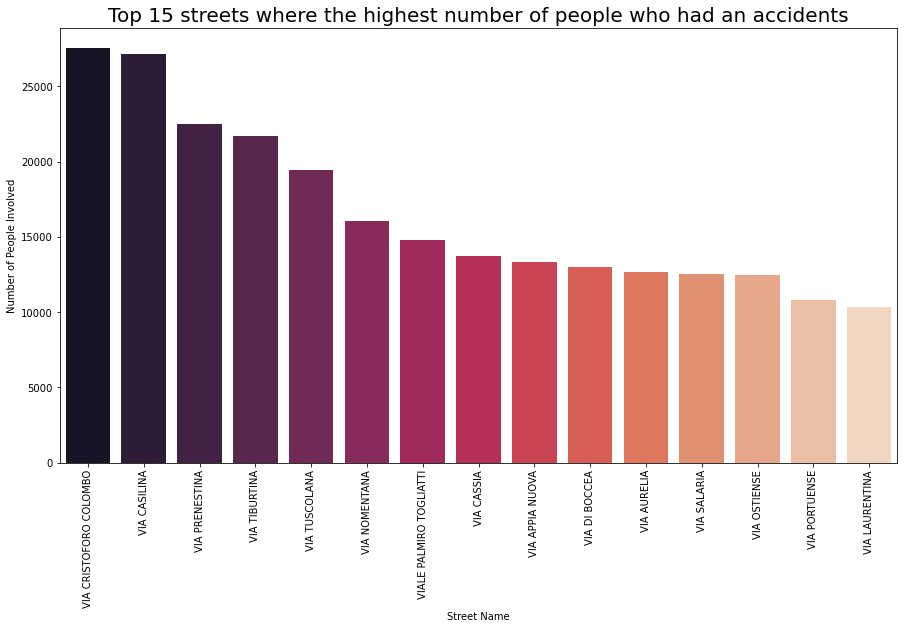

In [42]:
dang_st = df2['STRADA1'].value_counts()[:15].reset_index()
dang_st.columns = ["Street Name", "Number of People Involved"]
plt.figure(figsize=(15,8))
sns.barplot(x=dang_st['Street Name'], y=dang_st["Number of People Involved"],palette='rocket')
plt.xticks(rotation=90)
plt.title("Top 15 streets where the highest number of people who had an accidents",fontsize=20)
plt.show()

## <font color='darkred'>And the headline below tells everything:</font>
[source: roma.corriere.it](https://roma.corriere.it/notizie/cronaca/22_ottobre_21/via-cristoforo-colombo-roma-comune-ora-fermi-strage-e369be52-509e-11ed-9fe8-4b642e287986_amp.html)

![Headline about Cristoforo Colombo street calling it "La strada killer"](Cristoforo.png)

### The streets with the most number of deaths

In [43]:
dead_rows['STRADA1'].value_counts().head(15)

VIA CRISTOFORO COLOMBO     79
VIA CASILINA               72
VIA PRENESTINA             64
VIA TIBURTINA              61
VIA NOMENTANA              52
VIA TUSCOLANA              44
VIA OSTIENSE               42
VIA CASSIA                 42
VIA SALARIA                39
VIA AURELIA                37
VIA LAURENTINA             31
VIALE PALMIRO TOGLIATTI    30
VIA PORTUENSE              27
VIA DEL MARE               27
VIA TRIONFALE              26
Name: STRADA1, dtype: int64

![Map of Roma with dangerous streets highlighted](roma_streets.jpeg)

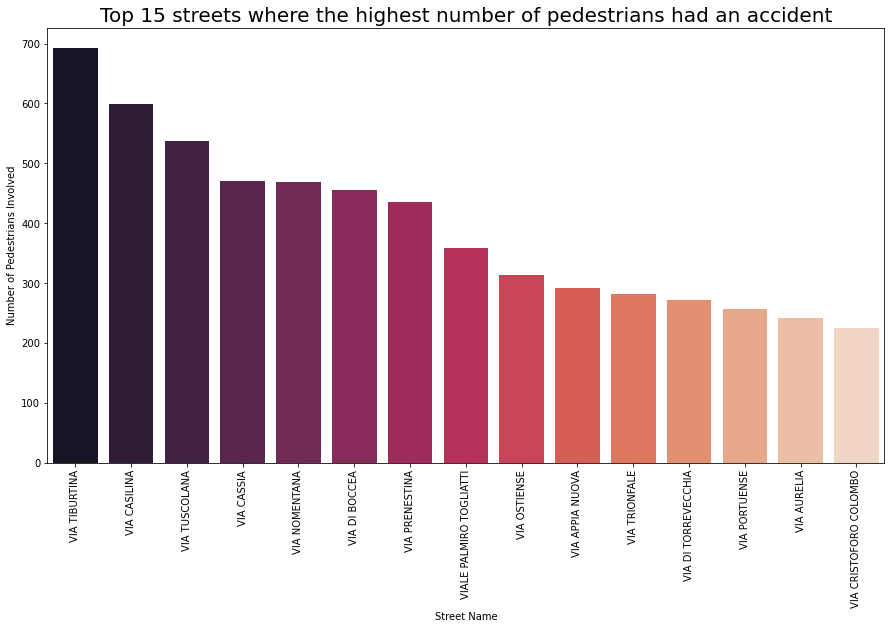

In [44]:
df_pedone = df2[df2['TipoPersona'] == 'Pedone']
dang_st_pedone = df_pedone['STRADA1'].value_counts()[:15].reset_index()
dang_st_pedone.columns = ["Street Name", "Number of Pedestrians Involved"]
plt.figure(figsize=(15,8))
sns.barplot(x=dang_st_pedone['Street Name'], y=dang_st_pedone["Number of Pedestrians Involved"],palette='rocket')
plt.xticks(rotation=90)
plt.title("Top 15 streets where the highest number of pedestrians had an accident",fontsize=20)
plt.show()

### The dangerous streets seem to be almost similar. There is only one big difference that now Via Tiburtina comes first which is a crowded street with the main train station and a bus terminal

## Analyzing the severity of incidents

__Is any special type of vehicle more dangerous than others?__

In [45]:
vehicles = df2['TipoVeicolo'].value_counts()
vehicles.columns = ["Vehicle Type", "Number of people"]
vehicles.head(10)

Autovettura privata          913635
Motociclo a solo             130781
Autocarro inferiore 35 q.     57205
Motociclo con passeggero      28944
Ciclomotore                   19767
Autovettura pubblica          14366
Autovettura di polizia        12313
Autobus di linea               8026
Autocarro superiore 35 q.      7240
Autobus urbano                 6483
Name: TipoVeicolo, dtype: int64

In [46]:
deceduto = df2[df2['Deceduto'] == -1]
vehicles_deceduto = deceduto['TipoVeicolo'].value_counts()
vehicles_deceduto.columns = ["Vehicle Type", "Number of people deceduto"]
vehicles_deceduto.head(100)

Motociclo a solo              557
Autovettura privata           476
Motociclo con passeggero       91
Ciclomotore                    54
Velocipede                     42
Autocarro inferiore 35 q.      15
Autobus urbano                 12
Quadriciclo leggero             4
Autovettura pubblica            3
Monopattino elettrico           3
Autocarro superiore 35 q.       3
Ciclomotore con passeggero      2
Autoambulanza                   2
Autobus di linea                2
Autovettura di soccorso         1
Motrice                         1
Rimorchio                       1
Autoambulanza in servizio       1
Autoarticolato                  1
Bicicletta elettrica            1
Name: TipoVeicolo, dtype: int64

In [47]:
percentages_of_deaths_by_vehicle = round((vehicles_deceduto/vehicles_deceduto.sum()) * 100,ndigits=2)
percentages_of_deaths_by_vehicle

Motociclo a solo              43.79
Autovettura privata           37.42
Motociclo con passeggero       7.15
Ciclomotore                    4.25
Velocipede                     3.30
Autocarro inferiore 35 q.      1.18
Autobus urbano                 0.94
Quadriciclo leggero            0.31
Autovettura pubblica           0.24
Monopattino elettrico          0.24
Autocarro superiore 35 q.      0.24
Ciclomotore con passeggero     0.16
Autoambulanza                  0.16
Autobus di linea               0.16
Autovettura di soccorso        0.08
Motrice                        0.08
Rimorchio                      0.08
Autoambulanza in servizio      0.08
Autoarticolato                 0.08
Bicicletta elettrica           0.08
Name: TipoVeicolo, dtype: float64

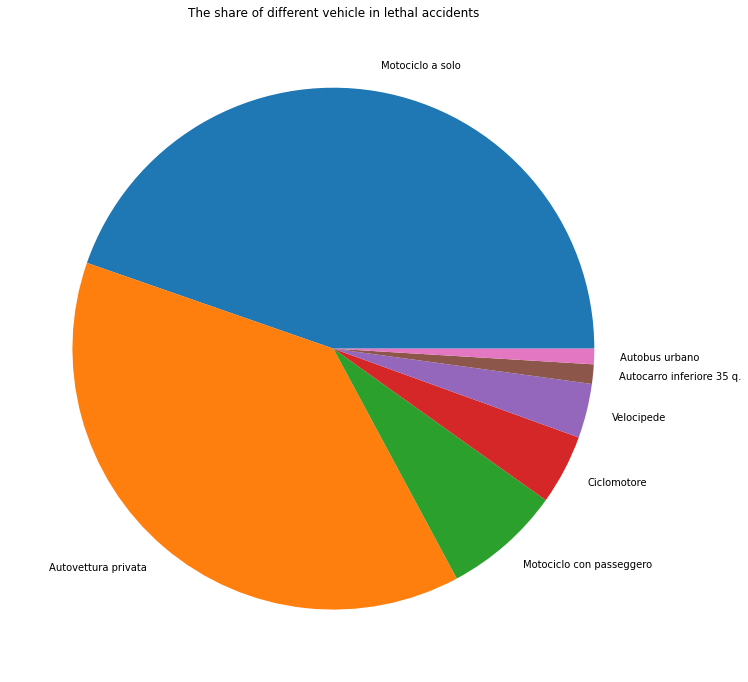

In [48]:
plt.figure(figsize=(12,12))
plt.pie(percentages_of_deaths_by_vehicle[:7], labels=percentages_of_deaths_by_vehicle.index[:7])
plt.title('The share of different vehicle in lethal accidents')
plt.show()

## As it can be seen, motorcycles contribute the most in the accidents resulting in deaths

## Let's check how the nature of accidents impact the severity:

In [49]:
Causes = df2['NaturaIncidente'].value_counts()
Causes.columns = ["NaturaIncidente", "Number of people"]
Causes

Scontro laterale fra veicoli in marcia                319849
Scontro frontale/laterale DX fra veicoli in marcia    181418
Scontro frontale/laterale SX fra veicoli in marcia    181075
Tamponamento                                          156131
Tamponamento Multiplo                                  86765
Investimento di pedone                                 72516
Veicolo in marcia contro ostacolo accidentale          46592
Scontro frontale fra veicoli in marcia                 45987
Veicolo in marcia contro veicolo in sosta              38907
Veicolo in marcia contro ostacolo fisso                37143
Veicolo in marcia contro veicolo fermo                 25316
Veicolo in marcia contro veicoli in sosta              18237
Infortunio per caduta del veicolo                      10906
Veicolo in marcia contro veicolo arresto               10537
Infortunio per sola frenata improvvisa                 10251
Ribaltamento senza urto contro ostacolo fisso           7764
Fuoriuscita dalla sede s

In [50]:
Causes_Deceduto = deceduto['NaturaIncidente'].value_counts()
Causes_Deceduto.columns = ["Natura Incidente", "Number of people deceduto"]
Causes_Deceduto

Investimento di pedone                                508
Veicolo in marcia contro ostacolo fisso               289
Scontro frontale fra veicoli in marcia                212
Scontro frontale/laterale DX fra veicoli in marcia    177
Scontro frontale/laterale SX fra veicoli in marcia    141
Scontro laterale fra veicoli in marcia                118
Fuoriuscita dalla sede stradale                        87
Tamponamento                                           62
Infortunio per caduta del veicolo                      44
Veicolo in marcia contro veicolo in sosta              39
Veicolo in marcia contro veicoli in sosta              20
Veicolo in marcia contro ostacolo accidentale          18
Ribaltamento senza urto contro ostacolo fisso          17
Tamponamento Multiplo                                  13
Veicolo in marcia contro veicolo fermo                 12
Infortunio per sola frenata improvvisa                 10
Veicolo in marcia contro veicoli fermi                  4
Veicolo in mar

In [51]:
percentages_of_deaths_by_nature = round((Causes_Deceduto/Causes_Deceduto.sum()) * 100,ndigits=2)
percentages_of_deaths_by_nature

Investimento di pedone                                28.59
Veicolo in marcia contro ostacolo fisso               16.26
Scontro frontale fra veicoli in marcia                11.93
Scontro frontale/laterale DX fra veicoli in marcia     9.96
Scontro frontale/laterale SX fra veicoli in marcia     7.93
Scontro laterale fra veicoli in marcia                 6.64
Fuoriuscita dalla sede stradale                        4.90
Tamponamento                                           3.49
Infortunio per caduta del veicolo                      2.48
Veicolo in marcia contro veicolo in sosta              2.19
Veicolo in marcia contro veicoli in sosta              1.13
Veicolo in marcia contro ostacolo accidentale          1.01
Ribaltamento senza urto contro ostacolo fisso          0.96
Tamponamento Multiplo                                  0.73
Veicolo in marcia contro veicolo fermo                 0.68
Infortunio per sola frenata improvvisa                 0.56
Veicolo in marcia contro veicoli fermi  

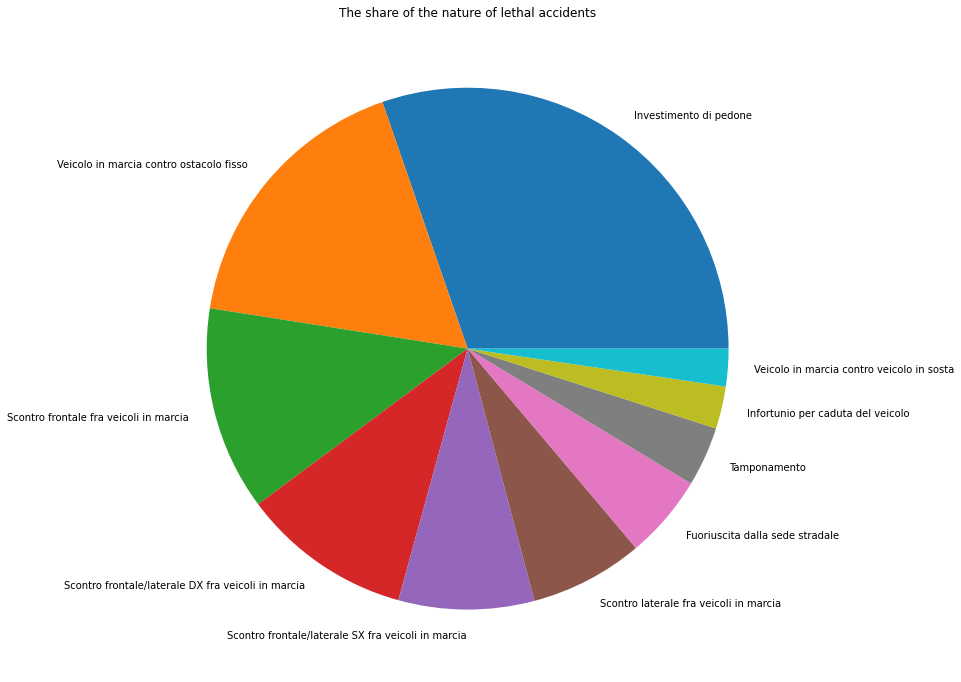

In [52]:
plt.figure(figsize=(12,12))
plt.pie(percentages_of_deaths_by_nature[:10], labels=percentages_of_deaths_by_nature.index[:10])
plt.title('The share of the nature of lethal accidents')
plt.show()

__Almost 30% of the deaths is the result of a vehicle running over a pedestrian__

# Turning the dates into TimeStamps

In [53]:
df2['DataOraIncidente'] = pd.to_datetime(df['DataOraIncidente'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/01/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/02/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/02/2006' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/04/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/05/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/05/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/05/2007' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/06/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/06/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/06/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2008' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/07/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/09/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/09/2009' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/12/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/12/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/01/2011' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/12/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/12/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/12/2011' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/04/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/06/2013' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/04/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/05/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/05/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/05/2014' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/02/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/02/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/02/2015' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/11/2015' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/10/2016' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/11/2017' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/12/2018' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/08/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/08/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/08/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/08/2019' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/02/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/02/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/02/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/02/2020' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/02/2021' in DD/MM/YYYY format. Provide format or specif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/11/2021' in DD/MM/YYYY format. Provide format or specif

__First we want to see the number of deaths in each year:__

In [54]:
dead_rows = df2[(df2['Deceduto'] == -1) | ((df2['Deceduto'] != -1) & (df2['DecedutoDopo'] != 'Did not die') & (df2['DecedutoDopo'].notnull()))]

In [55]:
dead_rows['DataOraIncidente'].dt.year

1169       2006
1170       2006
1468       2006
2274       2006
2754       2006
           ... 
1263085    2021
1263437    2021
1263438    2021
1263553    2021
1264455    2021
Name: DataOraIncidente, Length: 2441, dtype: int64

In [55]:
dead_rows['DataOraIncidente'].dt.year.value_counts()

2006    215
2007    194
2009    188
2008    171
2011    167
2010    164
2015    162
2014    150
2018    147
2012    140
2013    140
2017    140
2019    131
2016    127
2021    111
2020     94
Name: DataOraIncidente, dtype: int64

### The year 2006 has the most number of deaths with 215 cases, and a steady decrease has happened ever since:

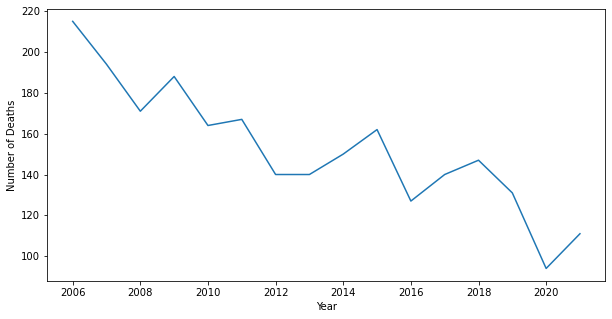

In [56]:
yearly_deaths = dead_rows['DataOraIncidente'].dt.year.value_counts().reset_index()
yearly_deaths.columns = ['Year', 'Number of Deaths']
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_deaths['Year'], y=yearly_deaths['Number of Deaths'])
plt.show()

#### yearly number of accidents:

In [57]:
df2.groupby(df2['DataOraIncidente'].dt.year).Protocollo.nunique()

DataOraIncidente
2006    40258
2007    37661
2008    35893
2009    35393
2010    36067
2011    36091
2012    31654
2013    31352
2014    29052
2015    28390
2016    30226
2017    29477
2018    29558
2019    30383
2020    21006
2021    28298
Name: Protocollo, dtype: int64

In [58]:
df2.groupby(df2['DataOraIncidente'].dt.year).Protocollo.nunique().mean()

31922.4375

__On average 31922 accidents happen each year__

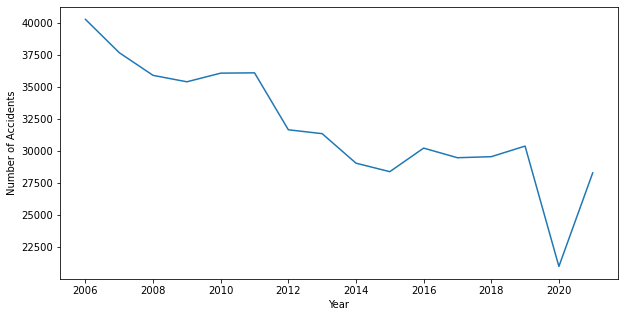

In [59]:
yearly_accidents = df2.groupby(df2['DataOraIncidente'].dt.year).Protocollo.nunique().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_accidents['DataOraIncidente'], y=yearly_accidents['Protocollo'])
plt.xlabel("Year")
plt.ylabel('Number of Accidents')
plt.show()

## There has been a sharp drop in the number of accidents in 2020 possibly due to the spread of COVID-19 pandemic and its consequences

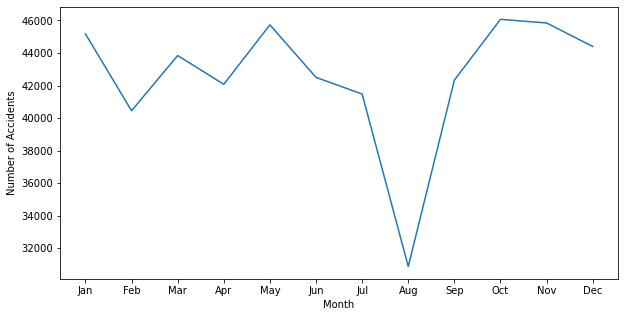

In [60]:
monthly_accidents = df2.groupby(df2['DataOraIncidente'].dt.month).Protocollo.nunique().reset_index()
monthsOfYear = {0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'}
monthly_accidents['DataOraIncidente'] = monthsOfYear.values()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_accidents['DataOraIncidente'], y=monthly_accidents['Protocollo'])
plt.xlabel("Month")
plt.ylabel('Number of Accidents')
plt.show()

## As it can be seen in the graph below, there is a sharp drop in the number of accidents in August showing that summer holidays probably reduces the traffic inside the city:

## In terms of the days of the week,  the figures also drop at the weekend:

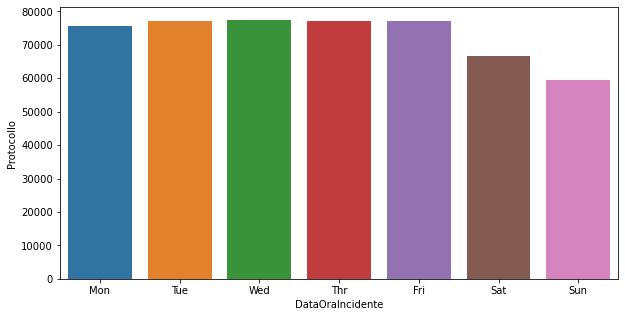

In [61]:
daily_accidents = df2.groupby(df2['DataOraIncidente'].dt.dayofweek).Protocollo.nunique().reset_index()
dayOfWeek = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thr', 4:'Fri', 5:'Sat', 6:'Sun'}
daily_accidents['DataOraIncidente'] = dayOfWeek.values()
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_accidents['DataOraIncidente'], y=daily_accidents['Protocollo'])
plt.show()

## The most dangerous hours of the day:

In [62]:
hour_accidents = df2.groupby(df2['DataOraIncidente'].dt.hour).Protocollo.nunique().reset_index()

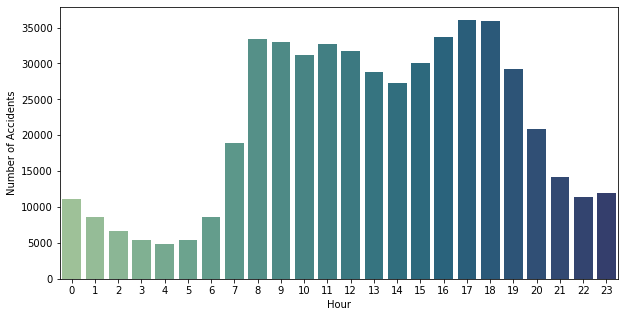

In [63]:
hour_accidents.columns = ['Hour', 'Number of Accidents']
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_accidents['Hour'], y=hour_accidents['Number of Accidents'], palette='crest')
plt.show()

# Geographical distribution:
For this purpose, Folium library is used to create a sort of dynamic map 

In [65]:
Roma_map = flm.Map(location = [41.9028, 12.4964],zoom_start = 11)

In [66]:
from folium.plugins import HeatMap
Roma_map = flm.Map(location = [41.9028, 12.4964],zoom_start = 11)
heatmap_df = df2[['Protocollo', 'Latitudine','Longitudine']].dropna()
heatmap_df = heatmap_df.agg(lambda x: x.replace(',', '.', regex=True))
heatmap_df = heatmap_df.astype(float)
heatmap_df = heatmap_df.groupby('Protocollo').mean()
HeatMap(

    data=list(zip(heatmap_df['Latitudine'],

                  heatmap_df['Longitudine']          
                  )  )   ,

    radius   = 13

).add_to(Roma_map)

In [67]:
Roma_map

__The map illustrates the distribution of the incidents within the city and its suburbs. As we approach the center, there seems to be a higher rate of accidents. Also, as we saw in the analysis of the dangerous streets,  the ones with the most accident rates, were the roads towards the main suburbs. In particular, the area around Cristoforo Colombo road which goes to the beach in the south west is clearly highlighted in the heatmap__

In [68]:
Roma_map2 = flm.Map(location = [41.9028, 12.4964],zoom_start = 11)
heatmap_dfp = df_pedone[['Protocollo', 'Latitudine','Longitudine']].dropna()
heatmap_dfp = heatmap_dfp.agg(lambda x: x.replace(',', '.', regex=True))
heatmap_dfp = heatmap_dfp.astype(float)
heatmap_dfp = heatmap_dfp.groupby('Protocollo').mean()
HeatMap(

    data=list(zip(heatmap_dfp['Latitudine'],

                  heatmap_dfp['Longitudine']
                  ) )   ,

    radius   = 13

).add_to(Roma_map2)

In [69]:
Roma_map2

__It is clearly shown in the map that there are fewer cases of accidents involving pedestrians in the outer ring of Roma. This is particularly noticeable looking at the area with the most dangerous streets (e.g. Via Cristoforo Colombo) where there are empty spaces in the pedestrian heatmap__

In [70]:
Roma_map3 = flm.Map(location = [41.9028, 12.4964],zoom_start = 11)
dead_rows_coor = df2[df2['NUM_MORTI'] > 0][['Protocollo', 'Latitudine', 'Longitudine']].dropna()
dead_rows_coor = dead_rows_coor.agg(lambda x: x.replace(',', '.', regex=True))
dead_rows_coor = dead_rows_coor.astype(float)
dead_rows_coor = dead_rows_coor.groupby('Protocollo').mean()
HeatMap(

    data=list(zip(dead_rows_coor['Latitudine'],

                  dead_rows_coor['Longitudine']
                  ) )   ,

    radius   = 8

).add_to(Roma_map3)

### The heatmap of the distribution of deadly accidents:

In [71]:
Roma_map3

# <font color="darkblue">Part 3: Looking for possible correlations</font>

### The relation between airbag and deaths:

In [72]:
airbag_death = df2[['Airbag', 'Deceduto']][df2['Deceduto'] == -1].dropna()

In [73]:
airbag_death

Airbag  Deceduto
1169         Esploso      -1.0
1170         Esploso      -1.0
2274         Esploso      -1.0
2754     Inesistente      -1.0
3289     Inesistente      -1.0
...              ...       ...
1239381    Inesploso      -1.0
1249558      Esploso      -1.0
1256500    Inesploso      -1.0
1263437      Esploso      -1.0
1263553      Esploso      -1.0

[917 rows x 2 columns]

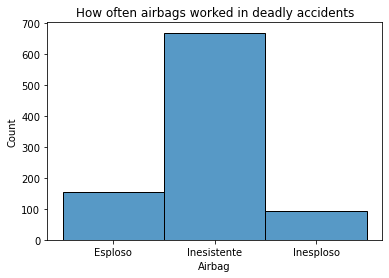

In [74]:
sns.histplot(airbag_death['Airbag'])
plt.title("How often airbags worked in deadly accidents")
plt.show()

__Unfortunately in this case there are many missing values. Anyway, In most cases where somebody has passed away, there were no airbags available__

__We can investigate if airbag affects the severity of an incident based on type of injury__ 

In [75]:
aaa = df2[['Airbag', 'Tipolesione']]
airbag_injury = aaa[aaa['Tipolesione'] != 'Illeso']

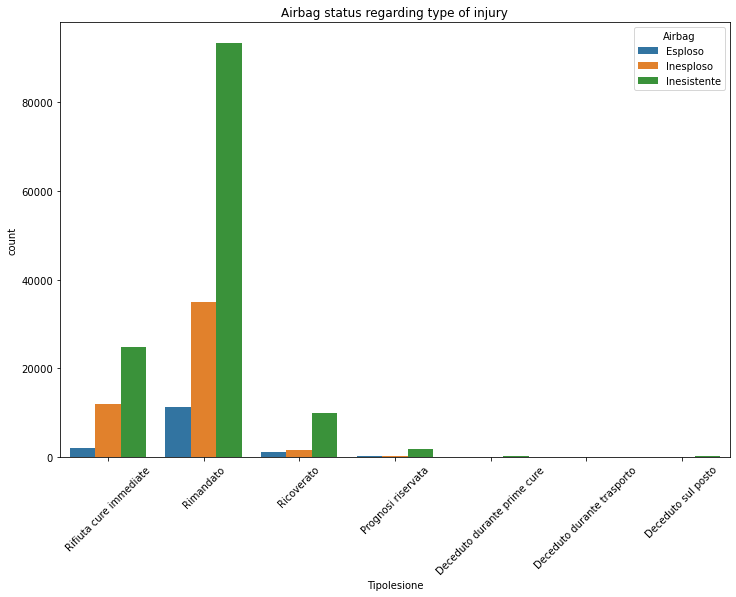

In [76]:
plt.figure(figsize=(12,8))
sns.countplot(x=airbag_injury['Tipolesione'], hue=airbag_injury['Airbag'])
plt.xticks(rotation = 45)
plt.title("Airbag status regarding type of injury")
plt.show()

In [77]:
dead_portion = airbag_injury[(airbag_injury['Tipolesione'] == 'Deceduto durante prime cure') | (airbag_injury['Tipolesione'] == 'Deceduto durante trasporto') \
    | (airbag_injury['Tipolesione'] == 'Deceduto sul posto')]

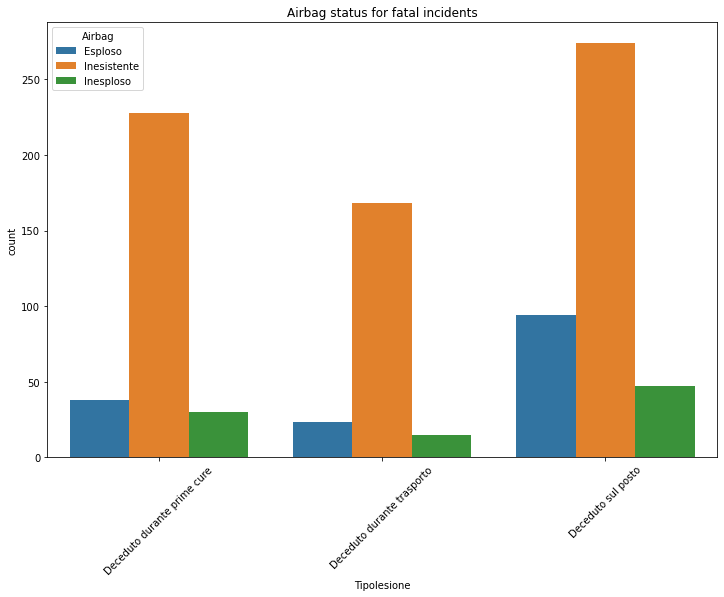

In [78]:
plt.figure(figsize=(12,8))
sns.countplot(x=dead_portion['Tipolesione'], hue=dead_portion['Airbag'])
plt.xticks(rotation = 45)
plt.title('Airbag status for fatal incidents')
plt.show()

### In cases of deadly accidents, there are more cases where the airbag exploded than not. This could be because in such cases the vehicles had a higher speed and therefore a stronger impact which is more likely to trigger the airbag

## Let's analyze now the usage of helmets or seatbelts:

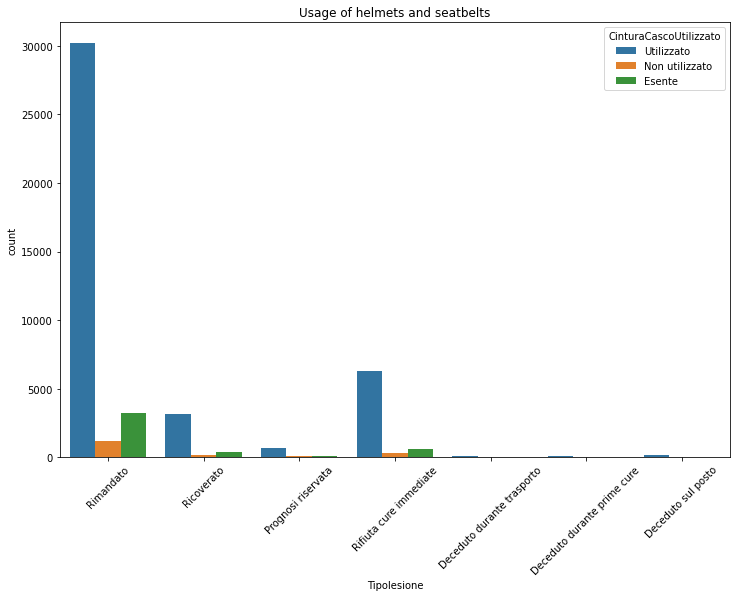

In [79]:
hb = df2[['CinturaCascoUtilizzato', 'Tipolesione']]
helmetBelt_injury = hb[(hb['Tipolesione'] != 'Illeso') & (hb['CinturaCascoUtilizzato'] != 'Non accertato')]
plt.figure(figsize=(12,8))
sns.countplot(x=helmetBelt_injury['Tipolesione'], hue=helmetBelt_injury['CinturaCascoUtilizzato'])
plt.xticks(rotation = 45)
plt.title('Usage of helmets and seatbelts')
plt.show()

In [80]:
df2['CinturaCascoUtilizzato'].value_counts()

Non accertato     886143
Utilizzato        175697
Esente             11368
Non utilizzato      6309
Name: CinturaCascoUtilizzato, dtype: int64

In [81]:
Used_by_year = df2[df2['CinturaCascoUtilizzato'] == 'Non utilizzato']['DataOraIncidente'].dt.year.value_counts()

In [82]:
incidents_by_year = df2['DataOraIncidente'].dt.year.value_counts()

In [83]:
usage_percentage = (Used_by_year/incidents_by_year)*100

In [84]:
usage_percentage

2006    0.696935
2007    0.674948
2008    0.508399
2009    0.671188
2010    0.656565
2011    0.476590
2012    0.513936
2013    0.471930
2014    0.569885
2015    0.423092
2016    0.385164
2017    0.360961
2018    0.366290
2019    0.353219
2020    0.309906
2021    0.320162
Name: DataOraIncidente, dtype: float64

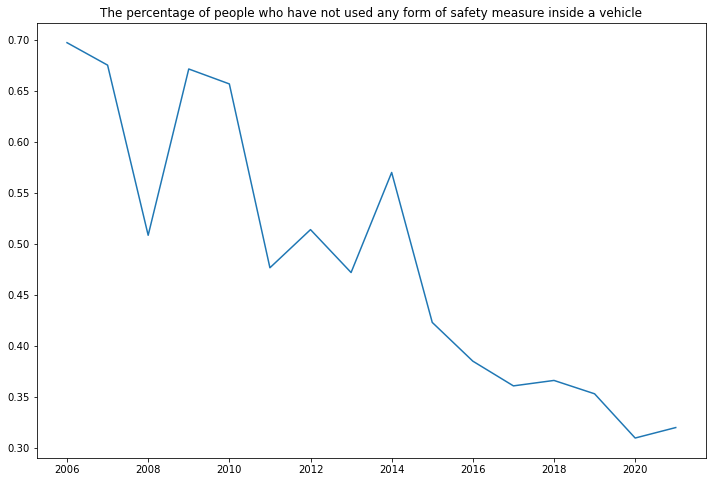

In [85]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = usage_percentage)
plt.ylabel('')
plt.title('The percentage of people who have not used any form of safety measure inside a vehicle')
plt.show()

### <font color='darkorange'> The number of people involved in an accident who have not used a helmet or fastened the seatbelt has decreased over the years</font> 

<font color='darkred'>__We would like to know if the severity of accidents follows the same trend. To do so, we need a numerical column that here we call Severity which is based on 'Tipolesione' and has values from 1 to 8, 8 being the most severe case.__</font>

In [86]:
df2['Severity']=df2['Tipolesione']
df2['Severity']

0                          Illeso
1                          Illeso
2          Rifiuta cure immediate
3                          Illeso
4                          Illeso
                    ...          
1265390                       NaN
1265391                    Illeso
1265392                    Illeso
1265393                    Illeso
1265394                Ricoverato
Name: Severity, Length: 1265389, dtype: object

In [87]:
df2['Severity'] = df2['Severity'].replace(['Illeso', 'Rifiuta cure immediate', 'Rimandato', 'Ricoverato', \
                                           'Prognosi riservata', 'Deceduto durante trasporto', 'Deceduto durante prime cure',\
                                           'Deceduto sul posto'], [1, 2, 3, 4, 5, 6, 7, 8])

In [88]:
df2['Severity'].value_counts()

1.0    952709
3.0    210943
2.0     50975
4.0     23310
5.0      4939
8.0       817
7.0       648
6.0       312
Name: Severity, dtype: int64

we can see a clear correlation as the severity goes high, the number of occurances drops

In [89]:
severity_average_yearly = df2.groupby(df2["DataOraIncidente"].dt.year)['Severity'].mean()

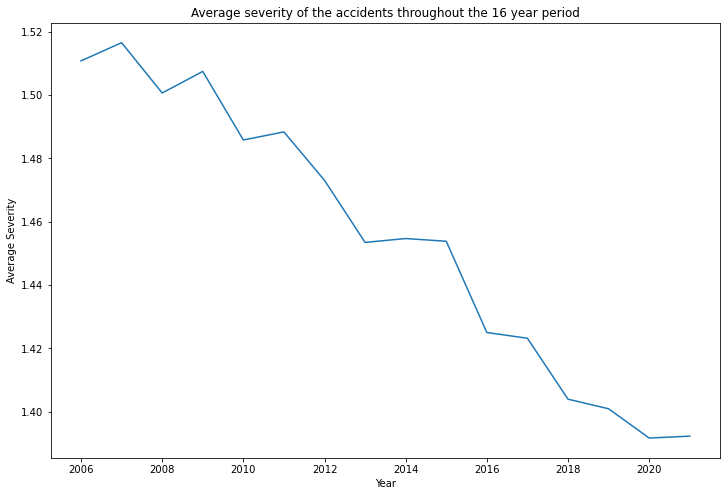

In [90]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = severity_average_yearly)
plt.ylabel('Average Severity')
plt.xlabel('Year')
plt.title('Average severity of the accidents throughout the 16 year period')
plt.show()

__It is obvious according to the graph that the average severity of the accidents has reduced over the course of 16 years__

# Analyzing the gender variable

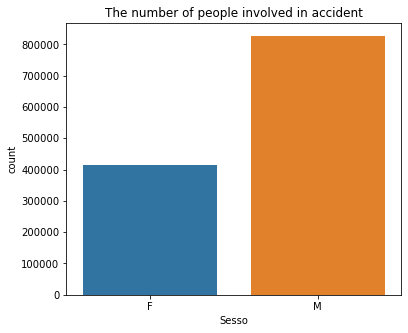

In [91]:
plt.figure(figsize=(6,5))
sns.countplot(x='Sesso',data=df2)
plt.title("The number of people involved in accident")
plt.show()

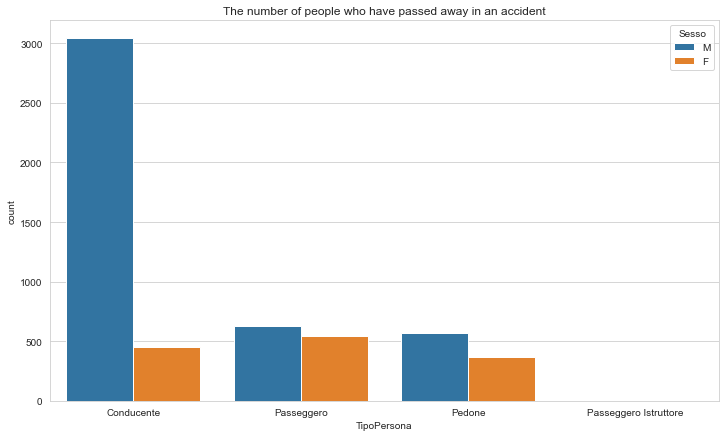

In [92]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.countplot(x='TipoPersona',data=df2[df2['NUM_MORTI'] > 0], hue='Sesso')
plt.title('The number of people who have passed away in an accident')
plt.show()

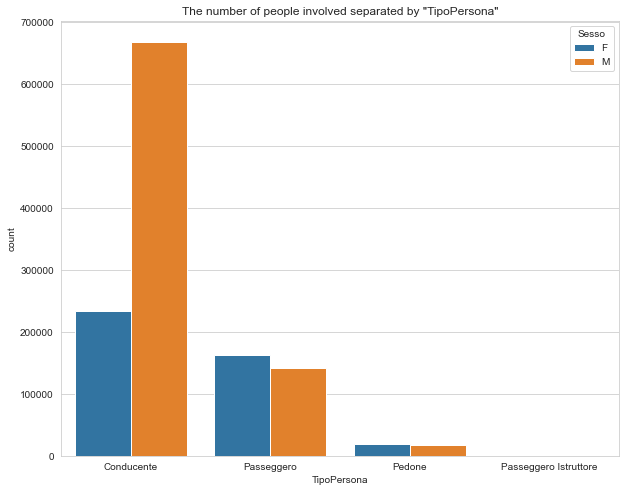

In [93]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.countplot(x='TipoPersona',hue='Sesso',data=df2)
plt.title('The number of people involved separated by "TipoPersona"')
plt.show()

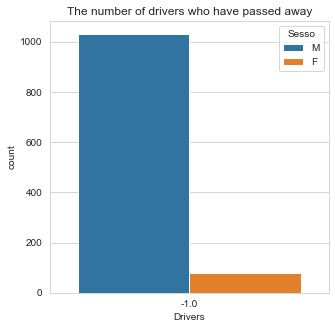

In [94]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x='Deceduto',hue='Sesso',data=df2[(df2['Deceduto'] == -1) & (df2['TipoPersona'] == 'Conducente')])
plt.title('The number of drivers who have passed away')
plt.xlabel('Drivers')
plt.show()

__Overall, men are generally more involved in accidents, they also form a higher proportion of drivers. That is probably the reason why they are also exposed to the risk of death.__

### <font color="darkred">The correlation between traffic and severity</font>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


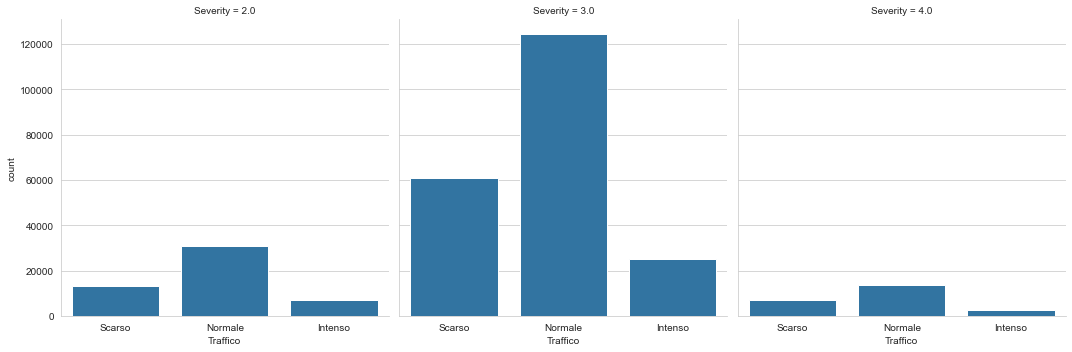

In [95]:
g = sns.FacetGrid(df2[(df2["Severity"] < 5) & (df2['Severity'] > 1)], col="Severity", height=5)
g.map(sns.countplot, "Traffico")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


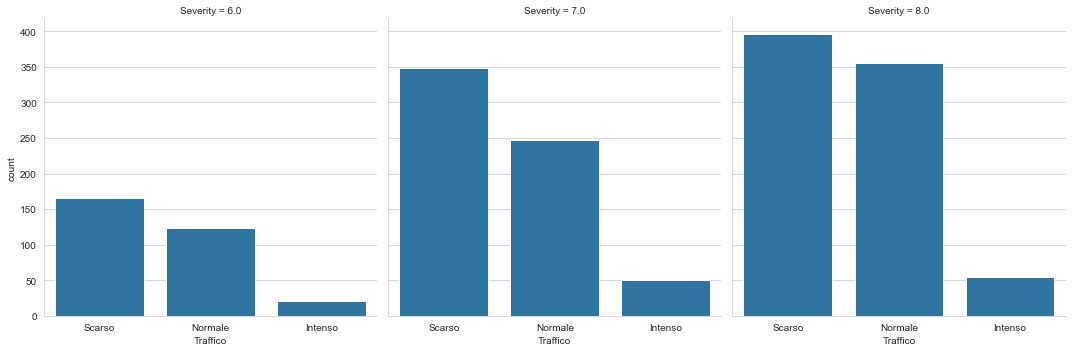

In [96]:
g = sns.FacetGrid(df2[df2["Severity"] > 5], col="Severity", height=5)
g.map(sns.countplot, "Traffico")

### It can be understood from the charts above that there is some sort of correlation between the level of traffic and the severity of the incident. This could be due to the higher speed at times when the roads are less busy.

# <font color="darkblue">Part 4: Predictive Models</font>

## In this part the possibility of building some kind of predictive models using different machine learning algorithms is investigated and regardless of the quality of the models, we try to interpret the results of the models

# Model 1 Logistic Regression Predicting Deceduto
__In this model we would like to try to predict the feature 'Deceduto' based on 4 other features. Since all of them are categorical we apply a logistic regression model using OneHotEncoding__

In [96]:
LR_data1 = df2[['Localizzazione1', 'TipoStrada', "Traffico", 'TipoPersona','Deceduto']]
LR_data1

Localizzazione1                      TipoStrada Traffico TipoPersona  \
0         Strada Urbana                 Due carreggiate   Scarso  Conducente   
1         Strada Urbana                 Due carreggiate   Scarso  Passeggero   
2         Strada Urbana                 Due carreggiate   Scarso  Conducente   
3         Strada Urbana                 Due carreggiate   Scarso  Passeggero   
4         Strada Urbana                 Due carreggiate   Scarso  Passeggero   
...                 ...                             ...      ...         ...   
1265390             NaN                             NaN      NaN         NaN   
1265391   Strada Urbana  Una carreggiata a doppio senso  Normale  Conducente   
1265392   Strada Urbana  Una carreggiata a doppio senso  Normale  Conducente   
1265393   Strada Urbana                 Due carreggiate   Scarso  Conducente   
1265394   Strada Urbana  Una carreggiata a doppio senso  Normale  Conducente   

         Deceduto  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
1265390       NaN  
1265391       0.0  
1265392       0.0  
1265393       0.0  
1265394       0.0  

[1265389 rows x 5 columns]

In [97]:
LR_data1.isnull().sum()

Localizzazione1     6226
TipoStrada          6331
Traffico            6611
TipoPersona        20736
Deceduto           20736
dtype: int64

In [98]:
LR_data1.dropna(inplace=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_4704\2694396851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LR_data1.dropna(inplace=True)


In [99]:
LR_data1.isnull().sum()

Localizzazione1    0
TipoStrada         0
Traffico           0
TipoPersona        0
Deceduto           0
dtype: int64

In [100]:
LR_data1['Deceduto'].value_counts()

 0.0    1236902
-1.0       1764
Name: Deceduto, dtype: int64

### dealing with categorical data:

In [101]:
LR_data1

Localizzazione1                               TipoStrada Traffico  \
0         Strada Urbana                          Due carreggiate   Scarso   
1         Strada Urbana                          Due carreggiate   Scarso   
2         Strada Urbana                          Due carreggiate   Scarso   
3         Strada Urbana                          Due carreggiate   Scarso   
4         Strada Urbana                          Due carreggiate   Scarso   
...                 ...                                      ...      ...   
1265389   Strada Urbana  Una carreggiata a senso unico di marcia  Normale   
1265391   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265392   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265393   Strada Urbana                          Due carreggiate   Scarso   
1265394   Strada Urbana           Una carreggiata a doppio senso  Normale   

        TipoPersona  Deceduto  
0        Conducente       0.0  
1        Passeggero       0.0  
2        Conducente       0.0  
3        Passeggero       0.0  
4        Passeggero       0.0  
...             ...       ...  
1265389  Conducente       0.0  
1265391  Conducente       0.0  
1265392  Conducente       0.0  
1265393  Conducente       0.0  
1265394  Conducente       0.0  

[1238666 rows x 5 columns]

In [102]:
typeOfPerson = pd.get_dummies(LR_data1['TipoPersona'])
typeOfPerson.head()

Conducente  Passeggero  Passeggero Istruttore  Pedone
0           1           0                      0       0
1           0           1                      0       0
2           1           0                      0       0
3           0           1                      0       0
4           0           1                      0       0

In [103]:
traffic = pd.get_dummies(LR_data1['Traffico'])
traffic.head()

Intenso  Normale  Scarso
0        0        0       1
1        0        0       1
2        0        0       1
3        0        0       1
4        0        0       1

In [104]:
typeOfRoad = pd.get_dummies(LR_data1['TipoStrada'])
typeOfRoad.head()

Due carreggiate  Più di due carreggiate  Una carreggiata a doppio senso  \
0                1                       0                               0   
1                1                       0                               0   
2                1                       0                               0   
3                1                       0                               0   
4                1                       0                               0   

   Una carreggiata a senso unico alternato  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Una carreggiata a senso unico di marcia  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

In [105]:
localization = pd.get_dummies(LR_data1['Localizzazione1'])
localization.head()

Altra strada  Autostrada  Comunale extraurbana  Provinciale  \
0             0           0                     0            0   
1             0           0                     0            0   
2             0           0                     0            0   
3             0           0                     0            0   
4             0           0                     0            0   

   Provinciale entro l'abitato  Regionale  Regionale entro l'abitato  Statale  \
0                            0          0                          0        0   
1                            0          0                          0        0   
2                            0          0                          0        0   
3                            0          0                          0        0   
4                            0          0                          0        0   

   Statale entro l'abitato  Strada Urbana  
0                        0              1  
1                        0              1  
2                        0              1  
3                        0              1  
4                        0              1

In [106]:
LR_data1

Localizzazione1                               TipoStrada Traffico  \
0         Strada Urbana                          Due carreggiate   Scarso   
1         Strada Urbana                          Due carreggiate   Scarso   
2         Strada Urbana                          Due carreggiate   Scarso   
3         Strada Urbana                          Due carreggiate   Scarso   
4         Strada Urbana                          Due carreggiate   Scarso   
...                 ...                                      ...      ...   
1265389   Strada Urbana  Una carreggiata a senso unico di marcia  Normale   
1265391   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265392   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265393   Strada Urbana                          Due carreggiate   Scarso   
1265394   Strada Urbana           Una carreggiata a doppio senso  Normale   

        TipoPersona  Deceduto  
0        Conducente       0.0  
1        Passeggero       0.0  
2        Conducente       0.0  
3        Passeggero       0.0  
4        Passeggero       0.0  
...             ...       ...  
1265389  Conducente       0.0  
1265391  Conducente       0.0  
1265392  Conducente       0.0  
1265393  Conducente       0.0  
1265394  Conducente       0.0  

[1238666 rows x 5 columns]

In [107]:
LR_data1 = pd.concat([LR_data1, traffic,typeOfRoad, localization, typeOfPerson], axis=1)

In [108]:
LR_data1

Localizzazione1                               TipoStrada Traffico  \
0         Strada Urbana                          Due carreggiate   Scarso   
1         Strada Urbana                          Due carreggiate   Scarso   
2         Strada Urbana                          Due carreggiate   Scarso   
3         Strada Urbana                          Due carreggiate   Scarso   
4         Strada Urbana                          Due carreggiate   Scarso   
...                 ...                                      ...      ...   
1265389   Strada Urbana  Una carreggiata a senso unico di marcia  Normale   
1265391   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265392   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265393   Strada Urbana                          Due carreggiate   Scarso   
1265394   Strada Urbana           Una carreggiata a doppio senso  Normale   

        TipoPersona  Deceduto  Intenso  Normale  Scarso  Due carreggiate  \
0        Conducente       0.0        0        0       1                1   
1        Passeggero       0.0        0        0       1                1   
2        Conducente       0.0        0        0       1                1   
3        Passeggero       0.0        0        0       1                1   
4        Passeggero       0.0        0        0       1                1   
...             ...       ...      ...      ...     ...              ...   
1265389  Conducente       0.0        0        1       0                0   
1265391  Conducente       0.0        0        1       0                0   
1265392  Conducente       0.0        0        1       0                0   
1265393  Conducente       0.0        0        0       1                1   
1265394  Conducente       0.0        0        1       0                0   

         Più di due carreggiate  Una carreggiata a doppio senso  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
1265389                       0                               0   
1265391                       0                               1   
1265392                       0                               1   
1265393                       0                               0   
1265394                       0                               1   

         Una carreggiata a senso unico alternato  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
1265389                                        0   
1265391                                        0   
1265392                                        0   
1265393                                        0   
1265394                                        0   

         Una carreggiata a senso unico di marcia  Altra strada  Autostrada  \
0                                              0             0           0   
1                                              0             0           0   
2                                              0             0           0   
3                                              0             0           0   
4                                              0             0           0   
...                                          ...           ...         ...   
1265389                                        1             0           0   
1265391                                        0             0           0   
1265392                               

In [109]:
LR_data1.drop(['Localizzazione1','TipoStrada', 'Traffico', 'TipoPersona' ], axis=1, inplace=True)

In [110]:
LR_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238666 entries, 0 to 1265394
Data columns (total 23 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Deceduto                                 1238666 non-null  float64
 1   Intenso                                  1238666 non-null  uint8  
 2   Normale                                  1238666 non-null  uint8  
 3   Scarso                                   1238666 non-null  uint8  
 4   Due carreggiate                          1238666 non-null  uint8  
 5   Più di due carreggiate                   1238666 non-null  uint8  
 6   Una carreggiata a doppio senso           1238666 non-null  uint8  
 7   Una carreggiata a senso unico alternato  1238666 non-null  uint8  
 8   Una carreggiata a senso unico di marcia  1238666 non-null  uint8  
 9   Altra strada                             1238666 non-null  uint8  
 10  Autostrada        

In [111]:
LR_data1['Deceduto'] = LR_data1["Deceduto"].astype(int)

In [112]:
X = LR_data1.drop('Deceduto', axis=1)
y = LR_data1['Deceduto']

## Train Test Split

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training and Predicting

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
logmodel1 = LogisticRegression(max_iter=1000)

In [117]:
logmodel1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [118]:
predictions1 = logmodel1.predict(X_test)

In [119]:
predictions1

array([0, 0, 0, ..., 0, 0, 0])

## Evaluation

#### Score

In [120]:
print(logmodel1.score(X_test,y_test))

0.9984983853606028


In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
print(confusion_matrix(y_test,predictions1))

[[     0    558]
 [     0 371042]]


## Classification Report

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       558
           0       1.00      1.00      1.00    371042

    accuracy                           1.00    371600
   macro avg       0.50      0.50      0.50    371600
weighted avg       1.00      1.00      1.00    371600



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
predictions1

array([0, 0, 0, ..., 0, 0, 0])

In [126]:
np.where(predictions1 == -1)

(array([], dtype=int64),)

### Apparently this method is not proper with the type of data that we have chosen. One reason could be the unbalanced distribution of the target variable that makes the model only predict the value 0 for Deceduto

# Model 2: Logistic Regression Predicting Illeso:
__This time we try to build a more balanced target by choosing Illeso column and grouping its values into only two classes of injured and not injured__ 

In [127]:
illeso = df2[df2['Tipolesione'] == 'Illeso'].index

In [128]:
df2.drop(index=illeso)['Tipolesione'].value_counts().sum()

291944

In [129]:
df2['Tipolesione'].value_counts()

Illeso                         952709
Rimandato                      210943
Rifiuta cure immediate          50975
Ricoverato                      23310
Prognosi riservata               4939
Deceduto sul posto                817
Deceduto durante prime cure       648
Deceduto durante trasporto        312
Name: Tipolesione, dtype: int64

In [130]:
model2_data = df2.copy()

In [131]:
na_lesione = model2_data[model2_data['Tipolesione'].isnull()].index
model2_data.drop(index=na_lesione, inplace=True)

In [132]:
model2_data['illeso'] = np.where(model2_data['Tipolesione'] == 'Illeso', 1, 0)

In [133]:
model2_data.illeso.value_counts()

1    952709
0    291944
Name: illeso, dtype: int64

### Now one third of the instances have the value of 0 for the column Illeso

In [134]:
model2_data.illeso.value_counts()[0] / model2_data.illeso.value_counts()[1] 

0.3064356482409634

In [135]:
model2_data['Tipolesione'].value_counts()

Illeso                         952709
Rimandato                      210943
Rifiuta cure immediate          50975
Ricoverato                      23310
Prognosi riservata               4939
Deceduto sul posto                817
Deceduto durante prime cure       648
Deceduto durante trasporto        312
Name: Tipolesione, dtype: int64

In [136]:
LR_data2 = model2_data[['Localizzazione1', 'TipoStrada', "Traffico", 'TipoPersona', 'illeso']]

In [137]:
LR_data2

Localizzazione1                               TipoStrada Traffico  \
0         Strada Urbana                          Due carreggiate   Scarso   
1         Strada Urbana                          Due carreggiate   Scarso   
2         Strada Urbana                          Due carreggiate   Scarso   
3         Strada Urbana                          Due carreggiate   Scarso   
4         Strada Urbana                          Due carreggiate   Scarso   
...                 ...                                      ...      ...   
1265389   Strada Urbana  Una carreggiata a senso unico di marcia  Normale   
1265391   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265392   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265393   Strada Urbana                          Due carreggiate   Scarso   
1265394   Strada Urbana           Una carreggiata a doppio senso  Normale   

        TipoPersona  illeso  
0        Conducente       1  
1        Passeggero       1  
2        Conducente       0  
3        Passeggero       1  
4        Passeggero       1  
...             ...     ...  
1265389  Conducente       1  
1265391  Conducente       1  
1265392  Conducente       1  
1265393  Conducente       1  
1265394  Conducente       0  

[1244653 rows x 5 columns]

In [138]:
LR_data2 = pd.get_dummies(model2_data[['Localizzazione1', 'TipoStrada', 'Traffico', 'TipoPersona' ]])

In [139]:
LR_data2['illeso'] = model2_data['illeso']

In [140]:
LR_data2

Localizzazione1_Altra strada  Localizzazione1_Autostrada  \
0                                   0                           0   
1                                   0                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   
...                               ...                         ...   
1265389                             0                           0   
1265391                             0                           0   
1265392                             0                           0   
1265393                             0                           0   
1265394                             0                           0   

         Localizzazione1_Comunale extraurbana  Localizzazione1_Provinciale  \
0                                           0                            0   
1                                           0                            0   
2                                           0                            0   
3                                           0                            0   
4                                           0                            0   
...                                       ...                          ...   
1265389                                     0                            0   
1265391                                     0                            0   
1265392                                     0                            0   
1265393                                     0                            0   
1265394                                     0                            0   

         Localizzazione1_Provinciale entro l'abitato  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
1265389                                            0   
1265391                                            0   
1265392                                            0   
1265393                                            0   
1265394                                            0   

         Localizzazione1_Regionale  Localizzazione1_Regionale entro l'abitato  \
0                                0                                          0   
1                                0                                          0   
2                                0                                          0   
3                                0                                          0   
4                                0                                          0   
...                            ...                                        ...   
1265389                          0                                          0   
1265391                          0                                          0   
1265392                          0                                          0   
1265393                          0                                          0   
1265394                          0                                          0   

         Localizzazione1_Statale  Localizzazione1_Statale entro l'abitato  \
0                              0                                        0   
1                              0                                        0   
2                              0                                        0   
3                              0                                        0   
4                              0                                        0   
...                          ...                                      ...   
1265389                        0                          

In [141]:
X2 = LR_data2.drop('illeso', axis=1)
y2 = LR_data2['illeso']

In [142]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [143]:
logmodel2 = LogisticRegression(max_iter=1000)

In [144]:
logmodel2.fit(X2_train, y2_train)

LogisticRegression(max_iter=1000)

In [145]:
predictions2 = logmodel2.predict(X2_test)
predictions2

array([1, 1, 1, ..., 1, 1, 1])

In [146]:
print(logmodel2.score(X2_test,y2_test))

0.7894648041221652


In [147]:
print(confusion_matrix(y2_test, predictions2))

[[  9952  77689]
 [   924 284831]]


In [148]:
print(classification_report(y2_test,predictions2))
# 0 means non-illeso

              precision    recall  f1-score   support

           0       0.92      0.11      0.20     87641
           1       0.79      1.00      0.88    285755

    accuracy                           0.79    373396
   macro avg       0.85      0.56      0.54    373396
weighted avg       0.82      0.79      0.72    373396



### Changing the tagret feature made the results a little better

# Model 3: Decision Tree Predicting Illeso
__We use the same features,  this time we wanted to try a different algorithm__

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [151]:
dtree = DecisionTreeClassifier()

In [152]:
dtree.fit(X3_train, y3_train)

DecisionTreeClassifier()

In [153]:
pred3 = dtree.predict(X3_test)

In [154]:
dtree.score(X3_test, y3_test)

0.7894433791470717

In [155]:
CM = confusion_matrix(y3_test, pred3)
print(CM)

[[  9957  77684]
 [   937 284818]]


In [156]:
print(classification_report(y3_test, pred3))

              precision    recall  f1-score   support

           0       0.91      0.11      0.20     87641
           1       0.79      1.00      0.88    285755

    accuracy                           0.79    373396
   macro avg       0.85      0.56      0.54    373396
weighted avg       0.82      0.79      0.72    373396



In [157]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

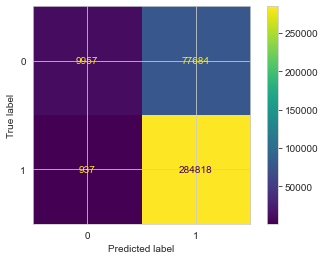

In [158]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()
plt.show()

__Decision Tree algorithm seems to have a similar result on this dataset, we would like to perform also random forest now__

# Model 4: Random Forest Predicting Illeso
__We use the same features again__

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
RFC = RandomForestClassifier()

In [161]:
RFC.fit(X2_train, y2_train)

RandomForestClassifier()

In [162]:
RFC_pred = RFC.predict(X2_test)

In [163]:
print(RFC.score(X2_test, y2_test))

0.7894460572689584


In [164]:
print(confusion_matrix(y2_test, RFC_pred))

[[  9954  77687]
 [   933 284822]]


In [165]:
print(classification_report(y2_test,RFC_pred))

              precision    recall  f1-score   support

           0       0.91      0.11      0.20     87641
           1       0.79      1.00      0.88    285755

    accuracy                           0.79    373396
   macro avg       0.85      0.56      0.54    373396
weighted avg       0.82      0.79      0.72    373396



## Random forest method also has the same result which might mean that the decision tree algorithm has chosen the most efficient path in terms of building the tree

## Finally we want to change our attitude towards the predicted feature, so we use the column severity that we defined before and try to predict among the 8 possible classes

# Model 5: Logistic Regression Predicting the Severity 

In [166]:
LR_data5 = df2[['Localizzazione1', 'TipoStrada', "Traffico", 'TipoPersona','Severity']]

In [167]:
LR_data5

Localizzazione1                      TipoStrada Traffico TipoPersona  \
0         Strada Urbana                 Due carreggiate   Scarso  Conducente   
1         Strada Urbana                 Due carreggiate   Scarso  Passeggero   
2         Strada Urbana                 Due carreggiate   Scarso  Conducente   
3         Strada Urbana                 Due carreggiate   Scarso  Passeggero   
4         Strada Urbana                 Due carreggiate   Scarso  Passeggero   
...                 ...                             ...      ...         ...   
1265390             NaN                             NaN      NaN         NaN   
1265391   Strada Urbana  Una carreggiata a doppio senso  Normale  Conducente   
1265392   Strada Urbana  Una carreggiata a doppio senso  Normale  Conducente   
1265393   Strada Urbana                 Due carreggiate   Scarso  Conducente   
1265394   Strada Urbana  Una carreggiata a doppio senso  Normale  Conducente   

         Severity  
0             1.0  
1             1.0  
2             2.0  
3             1.0  
4             1.0  
...           ...  
1265390       NaN  
1265391       1.0  
1265392       1.0  
1265393       1.0  
1265394       4.0  

[1265389 rows x 5 columns]

In [168]:
LR_data5.isnull().sum()

Localizzazione1     6226
TipoStrada          6331
Traffico            6611
TipoPersona        20736
Severity           20736
dtype: int64

In [169]:
LR_data5.dropna(inplace=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_4704\2621586486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LR_data5.dropna(inplace=True)


In [170]:
LR_data5.isnull().sum()

Localizzazione1    0
TipoStrada         0
Traffico           0
TipoPersona        0
Severity           0
dtype: int64

In [171]:
LR_data5

Localizzazione1                               TipoStrada Traffico  \
0         Strada Urbana                          Due carreggiate   Scarso   
1         Strada Urbana                          Due carreggiate   Scarso   
2         Strada Urbana                          Due carreggiate   Scarso   
3         Strada Urbana                          Due carreggiate   Scarso   
4         Strada Urbana                          Due carreggiate   Scarso   
...                 ...                                      ...      ...   
1265389   Strada Urbana  Una carreggiata a senso unico di marcia  Normale   
1265391   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265392   Strada Urbana           Una carreggiata a doppio senso  Normale   
1265393   Strada Urbana                          Due carreggiate   Scarso   
1265394   Strada Urbana           Una carreggiata a doppio senso  Normale   

        TipoPersona  Severity  
0        Conducente       1.0  
1        Passeggero       1.0  
2        Conducente       2.0  
3        Passeggero       1.0  
4        Passeggero       1.0  
...             ...       ...  
1265389  Conducente       1.0  
1265391  Conducente       1.0  
1265392  Conducente       1.0  
1265393  Conducente       1.0  
1265394  Conducente       4.0  

[1238666 rows x 5 columns]

In [172]:
Localization5 = pd.get_dummies(LR_data5['Localizzazione1'])
Localization5.head()

Altra strada  Autostrada  Comunale extraurbana  Provinciale  \
0             0           0                     0            0   
1             0           0                     0            0   
2             0           0                     0            0   
3             0           0                     0            0   
4             0           0                     0            0   

   Provinciale entro l'abitato  Regionale  Regionale entro l'abitato  Statale  \
0                            0          0                          0        0   
1                            0          0                          0        0   
2                            0          0                          0        0   
3                            0          0                          0        0   
4                            0          0                          0        0   

   Statale entro l'abitato  Strada Urbana  
0                        0              1  
1                        0              1  
2                        0              1  
3                        0              1  
4                        0              1

In [173]:
typeOfStreet5 = pd.get_dummies(LR_data5['TipoStrada'])
typeOfStreet5.head()

Due carreggiate  Più di due carreggiate  Una carreggiata a doppio senso  \
0                1                       0                               0   
1                1                       0                               0   
2                1                       0                               0   
3                1                       0                               0   
4                1                       0                               0   

   Una carreggiata a senso unico alternato  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Una carreggiata a senso unico di marcia  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

In [174]:
traffic5 = pd.get_dummies(LR_data5['Traffico'])
traffic5.head()

Intenso  Normale  Scarso
0        0        0       1
1        0        0       1
2        0        0       1
3        0        0       1
4        0        0       1

In [175]:
typeOfPerson5 = pd.get_dummies(LR_data5['TipoPersona'])
typeOfPerson5.head()

Conducente  Passeggero  Passeggero Istruttore  Pedone
0           1           0                      0       0
1           0           1                      0       0
2           1           0                      0       0
3           0           1                      0       0
4           0           1                      0       0

In [176]:
LR_data5 = pd.concat([LR_data5, traffic,typeOfStreet5, Localization5, typeOfPerson5], axis=1)

In [177]:
LR_data5.drop(columns=['Localizzazione1', 'TipoStrada', 'Traffico', 'TipoPersona'], inplace=True)

In [178]:
X5 = LR_data5.drop('Severity', axis=1)
y5 = LR_data5['Severity']

In [179]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=101)

In [180]:
logmodel5 = LogisticRegression(max_iter=1000)

In [181]:
logmodel5.fit(X5_train, y5_train)

LogisticRegression(max_iter=1000)

In [182]:
pred5 = logmodel5.predict(X5_test)

In [183]:
logmodel5.score(X5_test, y5_test)

0.7822039827771797

In [184]:
print(confusion_matrix(y5_test, pred5))

[[283472      0    873      0      0      0      0      0]
 [ 14686      0    507      0      0      0      0      0]
 [ 55921      0   7195      0      0      0      0      0]
 [  5390      0   1560      0      0      0      0      0]
 [   986      0    452      0      0      0      0      0]
 [    71      0     26      0      0      0      0      0]
 [   136      0     72      0      0      0      0      0]
 [   202      0     51      0      0      0      0      0]]


In [185]:
print(classification_report(y5_test, pred5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88    284345
         2.0       0.00      0.00      0.00     15193
         3.0       0.67      0.11      0.19     63116
         4.0       0.00      0.00      0.00      6950
         5.0       0.00      0.00      0.00      1438
         6.0       0.00      0.00      0.00        97
         7.0       0.00      0.00      0.00       208
         8.0       0.00      0.00      0.00       253

    accuracy                           0.78    371600
   macro avg       0.18      0.14      0.13    371600
weighted avg       0.71      0.78      0.71    371600



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
LR_data5.Severity.value_counts()

1.0    947475
3.0    210428
2.0     50850
4.0     23225
5.0      4924
8.0       808
7.0       646
6.0       310
Name: Severity, dtype: int64

## The model predicts only severity classes of 1 and 3 probably because these two classes together form more than 90% of the whole data 